
## Description of the  $e$-expansion of 

### $$\mathcal{F}_{mn}:=\mathcal{E}_{mn}[\mathbf{q}+1;\mathbf{x}]$$
We have
 $$
\langle \mathcal{E}_{n}[\mathbf{q}+1;\mathbf{x}],f_{k,1^{n-k}}\rangle 
= \sum_{j=1}^{n-k+1} \langle \mathcal{E}_{n}, s_{j,1^{k-1}}\rangle,\qquad \hbox{or equivalently}\qquad
\langle \mathcal{E}_{n}[\mathbf{q};\mathbf{x}],f_{k,1^{n-k}}\rangle =
\sum_{j=1}^{n-k+1}e_{j-1}^\perp \mathcal{A}_n[\mathbf{q}-1] $$


In [1]:
%display latex
%runfile MultiInit.py
%runfile Outils_globaux.py
%runfile Outils_impression.py
%runfile Outils_symmetriques.py

from sage.combinat.q_analogues import *

%runfile Outils_partages.py
%runfile Outils_tenseurs.py
%runfile Outils_Hall.py


Sym = SymmetricFunctions(FractionField(QQ['q','t']))
Sym.inject_shorthands()
H = Sym.macdonald().Ht()
HH = Sym.macdonald().H()
H.print_options(prefix="H")
t=H.t
q=H.q

P=Sym.macdonald(t=0).H()
Qp = P.dual_basis(prefix='Qp');

X=s[1]
Un=s([])
f = e.dual_basis(prefix='f');
zero=Partition([0])

M=(1-t)*(1-q)
S = SymmetricFunctions(QQ)

f._latex_term = lambda mu: "\mathbb{1}" if mu==zero else "f_{%s}"%(''.join(mystr(i) for i in mu))
H._latex_term = lambda mu: "\mathbb{1}" if mu==zero else "H_{%s}"%(''.join(mystr(i) for i in mu))
P._latex_term = lambda mu: "\mathbb{1}" if mu==zero else "P_{%s}"%(''.join(mystr(i) for i in mu))
s._latex_term = lambda mu: "\mathbb{1}" if mu==zero else "s_{%s}"%(''.join(mystr(i) for i in mu))
p._latex_term = lambda mu: "\mathbb{1}" if mu==zero else "p_{%s}"%(''.join(mystr(i) for i in mu))
h._latex_term = lambda mu: "\mathbb{1}" if mu==zero else "h_{%s}"%(''.join(mystr(i) for i in mu))
e._latex_term = lambda mu: "\mathbb{1}" if mu==zero else "e_{%s}"%(''.join(mystr(i) for i in mu))
m._latex_term = lambda mu: "\mathbb{1}" if mu==zero else "m_{%s}"%(''.join(mystr(i) for i in mu))


    
%runfile LLT.py
%runfile PLLT.py
%runfile Phi.py
RH.<z>=Sym[]
RH.inject_variables()

%runfile Rectangular.py

Pol_qt=PolynomialRing(QQ,['q','t'])

def MarcoPolo(ppol):
    pol=Pol_qt(ppol)
    N=pol.degree(Pol_qt(q))
    return matrix([[pol.coefficient({q:N-i,t:j})
                    for i in range(N+1)] 
                   for j in range(N+1)]).transpose()

Defining e as shorthand for Symmetric Functions over Fraction Field of Multivariate Polynomial Ring in q, t over Rational Field in the elementary basis
Defining f as shorthand for Symmetric Functions over Fraction Field of Multivariate Polynomial Ring in q, t over Rational Field in the forgotten basis
Defining h as shorthand for Symmetric Functions over Fraction Field of Multivariate Polynomial Ring in q, t over Rational Field in the homogeneous basis
Defining m as shorthand for Symmetric Functions over Fraction Field of Multivariate Polynomial Ring in q, t over Rational Field in the monomial basis
Defining p as shorthand for Symmetric Functions over Fraction Field of Multivariate Polynomial Ring in q, t over Rational Field in the powersum basis
Defining s as shorthand for Symmetric Functions over Fraction Field of Multivariate Polynomial Ring in q, t over Rational Field in the Schur basis
Defining z


In [2]:
def CalE_mn_alt_k(m,n):
    return ToBin(tobinom((Eval1(CalE_mn(m,n),q,{q}).scalar(e[n]))))

def CalE_mn_k(m,n):
    return ((s(Eval1(CalE_mn(m,n),q,{q})).map_coefficients(tobinom))).map_coefficients(ToBin)

def CalF_mn_k(m,n):
    return ((e(Eval1(CalF_mn(m,n),q,{q})).map_coefficients(tobinom))).map_coefficients(ToBin)

def En_zeta(F):
    return ((e(Eval1(F,q,{q})).map_coefficients(tobinom))).map_coefficients(ToBin)

def En_k(F):
     return (F.map_coefficients(tobinom)).map_coefficients(ToBin)

@cached_function
def Skew_hk_E_mn(k,m,n):
    return Skew1(h[k],CalE_mn(m,n))

def test_hook(m,n,k):
    return (Scalar2(CalE_mn(m,n),e[n])(Un+X).skew_by(e[n-1-k])
            ==Scalar2(CalF_mn(m,n),s([n-k]+[1 for i in range(k)])))

def Test_hook(m,n,k):
    return (Scalar2(CalF_mn(m,n),e[n]).skew_by(e[k-1])
            ==Scalar2(CalF_mn(m,n),s([k]+[1 for i in range(n-k)])))

@cached_function
def test_epos_hook(n,k):
    if k==0:
        return true
    else:
        mu=Partition(hook(n,n-k-1))
        return (Scalar2(CalF_mn(n,n),f(mu))
                ==add(Scalar2(CalE_mn(k+j),s([j]+list(colone(k))))
                      for j in range(1,n-k+1)))

# Test of 7 for "m"

def RHS_ekperp_F_mn(k,m,n):
    return add(Tenseur(pol_to_s((q^Aire(mu,m,n)*e[k](Un*add(q^(-a(mu,m,n)[i]) 
                                          for i in range(n-1) 
                                           if a(mu,m,n)[i]>a(mu,m,n)[i+1])).scalar(Un)).numerator())
               ,mul(e[k] for k in risers(mu,n))) for mu in Dyck(m,n))

def RHS_ekperp_F_mn(k,m,n=None):
    if n==None: return RHS_ekperp_F_mn(k,m,m)
    else: return add(Tenseur(pol_to_s((q^Aire(mu,m,n)*e[k](Un*add(q^(-a(mu,m,n)[i]) 
                                          for i in range(n-1) 
                                           if a(mu,m,n)[i]>a(mu,m,n)[i+1])).scalar(Un)).numerator())
               ,mul(e[k] for k in risers(mu,n)))*num_Intervale(mu,n) for mu in Dyck(m,n))

def num_Intervale(mu,n):
    return Intervale(staircase(3,3),Partition([0]),3).__len__()

def test_rel_ens(n,k,j):
    A=Set(range(1,k+1)+range(j,n))
    return CalA_mn(j).skew_by(e[k])==sigma_ens(A,n)

@cached_function
def sigma_ens(A,n):
    return add(sigma_prime(mu,n) for mu in Dyck(n) if to_ens(mu)==A)

def classe_set(A,n):
    return Set([mu for mu in Dyck(n) if to_ens(mu)==A])

def to_ens(mu):
    nu=list(mu)+[0]
    return Set([k for k in range(1,nu.__len__()) if nu[k-1]>nu[k]])

def relations_ens(n):
    return Set([Set(range(1,n))]+[Set(range(1,k+1)).union(Set([n-i for i in range(1,j+1)])) 
                                  for j in range(n) for k in range(n-j-1)])

@cached_function
def les_chaines_max(mu,n):
    if precede(mu,n)==[]:
        return Set([[mu]])
    else:
        return Set([c+[mu] for nu in precede(mu,n) for c in les_chaines_max(nu,n)])
    
def les_chaines(mu,n):
    mu=Partition(mu)
    return Set([tuple(d) for c in les_chaines_max(mu,n) for d in sous_chaines(c)])

def sous_chaines(c):
    n=c.__len__()-1
    if n==0: return Set([c])
    else: return Set([[c[0]]+d+[c[n]] for d in sublists([c[i] for i in range(1,n)])])

def sublists(c):
    n=c.__len__()
    if n==0:
        return [c]
    else:
        S=sublists([c[i] for i in range(1,n)])
        return S+[[c[0]]+d for d in S]

def contribution_F_mn_k(mu,n):
    return sigma_prime(mu,n)(q*Un,exclude={q}).scalar(Un)

@cached_function
def contribution_zeta(mu,n):
    return add(binomial(q,w.__len__()-1) for w in les_chaines(mu,n))

def Tout_zeta_k(n):
    return En_k(add(contribution_zeta(mu,n)*e_rho_mu(mu,n) for mu in Dyck(n)))

def En_k(F):
     return (F.map_coefficients(tobinom)).map_coefficients(ToBin)
    
@cached_function
def distance(mu,nu,n):
    if mu==nu: return 0
    else:
        listdist=[distance(mu,rho,n) for rho in precede(nu,n)]
        if listdist==[]: return -1
        else: 
            mdist=max([distance(mu,rho,n) for rho in precede(nu,n)])
            if mdist>=0:
                return mdist+1
            else: return -1
            
@cached_function
def les_distances(c,n):
    k=c.__len__()
    if k==1: return Composition([])
    else: return Composition([distance(c[i],c[i+1],n) for i in range(k-1)])
    
def LLT(mu,n,u=None):
    if u==None:
        return LLT(mu,n,t)
    else:
        if n>=7: correction=1
        else: correction=0
        mu=Partition(mu)
        if mu==Partition([0]) and n==1: return e[1]
        else:
            for (nu,llt) in ListeLLT[n-1]:
                if Partition(nu)==mu:
                    return e(llt.map_coefficients(lambda c: c.substitute({t:u-correction})))

@cached_function
def PLLT(mu,n):
    if n>PLLT_liste.__len__():
        return None
    else:
        for (nu,llt) in PLLT_liste[n-1]:
            if Partition(nu)==mu:
                return llt

### Test that we have $e$-positivity for $\mathcal{S}_\mu[\mathbf{q}+1;\mathbf{z}]$ only when $\mu$ is a hook

In [3]:
for n in range(1,7):
    show([(mu,Positif(CalF_mu(mu))) for mu in hooks(n)])

[([1], True)]

[([1, 1], True), ([2], True)]

[([1, 1, 1], True), ([2, 1], True), ([3], True)]

[([1, 1, 1, 1], True), ([2, 1, 1], True), ([3, 1], True), ([4], True)]

[([1, 1, 1, 1, 1], True),
 ([2, 1, 1, 1], True),
 ([3, 1, 1], True),
 ([4, 1], True),
 ([5], True)]

[([1, 1, 1, 1, 1, 1], True),
 ([2, 1, 1, 1, 1], True),
 ([3, 1, 1, 1], True),
 ([4, 1, 1], True),
 ([5, 1], True),
 ([6], True)]

In [4]:
def JT_F(nu):
    mu=Partition(nu).conjugate()
    n=mu.length()
    M=(mu.jacobi_trudi())
    def to_F(hk): 
        if hk==0: 
            return 0 
        else:
            k=hk.degree()
            return CalF_mu(colone(k)) 
    return matrix(n,n,lambda i,j:to_F(M[i,j])).det()

In [5]:
JT_F([3])

s[1, 1] # e[3] + s[2] # e[2, 1] + s[3] # e[3]

In [6]:
s[3].nabla(t=1)

(q^3+q^2)*s[1, 1, 1] + q^2*s[2, 1]

In [7]:
Dishout(N_Schur([3,1]))

([1, 1, 1, 1], s[2, 1] + s[4])

([2, 1, 1], s[1, 1] + s[2] + s[3])

([2, 2], s[2])

([3, 1], s[1])

In [9]:
JT_F([2,1])

-s[1] # e[2, 1] - s[1, 1] # e[3] - s[2] # e[2, 1] - s[3] # e[3]

In [10]:
Dishout(CalF_mu(Partition([3,1])),f)

([2, 1, 1], s[] + s[1])

([2, 2], s[2])

([3, 1], s[1] + s[1, 1] + s[2] + s[3])

([4], s[2, 1] + s[4])

### Formal Frobenius in terms of $k$

$$
\mathcal{E}_{mn}(k;z)=\sum_{\mu\vdash n} \sum_j b_{\mu,j}\binom{k}{j}\ s_\mu(z),
\qquad{\rm and}\qquad
\mathcal{E}_{mn}(1+k;z)=\sum_{\mu\vdash n} \sum_j c_{\mu,j}\binom{k}{j}\ e_\mu(z)$$

### This is an $e$-analog of the Zeta polynomial

In [11]:
CalF_mn_k(4,4)

(binomial(k,0))*e[1, 1, 1, 1] + (binomial(k,3)+4*binomial(k,2)+6*binomial(k,1))*e[2, 1, 1] + (binomial(k,4)+5*binomial(k,3)+7*binomial(k,2)+2*binomial(k,1))*e[2, 2] + (binomial(k,5)+8*binomial(k,4)+19*binomial(k,3)+18*binomial(k,2)+4*binomial(k,1))*e[3, 1] + (binomial(k,6)+9*binomial(k,5)+25*binomial(k,4)+29*binomial(k,3)+12*binomial(k,2)+binomial(k,1))*e[4]

## Does the hook-shape conjecture imply positivity of the coefficients in  $\mathcal{F}_{mn}$ for hooks?

In [12]:
n=7
m=6
F=CalF_mn(m,n)
for mu in hooks(n):
    show((mu,Scalar2(F,f(mu))
         -Scalar2(CalE_mn(m,n),s(mu.conjugate()))))

([1, 1, 1, 1, 1, 1, 1], 0)

([2, 1, 1, 1, 1, 1], 0)

([3, 1, 1, 1, 1], 0)

([4, 1, 1, 1], 0)

([5, 1, 1], 0)

([6, 1], 0)

([7], 0)

### For $\binom{n-2}{2}\leq k\leq \binom{n}{2}-n+1$, we have

## $$h_{k+n-1}^\perp \mathcal{E}_n= h_k^\perp \mathcal{E}_{n-1,n}$$

May be generalized (see below).

In [13]:
n=6
for k in range(binomial(n-2,2),binomial(n,2)-n+2):
    show((k,k+n-1,Skew1(h[k+n-1],CalE_mn(n))-Skew1(h[k],CalE_mn(n-1,n))))

(6, 11, 0)

(7, 12, 0)

(8, 13, 0)

(9, 14, 0)

(10, 15, 0)

In [14]:
n=5
for r in range(2,n):
    show((r,[(Skew_hk_E_mn(Deg1(CalE_mn(n,n))-Deg1(CalE_mn(r,n))+j,n,n)==Skew_hk_E_mn(j,r,n)) 
             for j in range(Deg1(CalE_mn(r,n))+1)]))

(2, [False, True, True])

(3, [False, False, True, True, True])

(4, [False, False, False, True, True, True, True])

In [15]:
n=6
for r in range(2,n):
    show((r,[(Skew_hk_E_mn(Deg1(CalE_mn(n,n))-Deg1(CalE_mn(r,n))+j,n,n)==Skew_hk_E_mn(j,r,n)) 
             for j in range(Deg1(CalE_mn(r,n))+1)]))

(2, [False, False, True, True])

(3, [False, False, False, False, True, True, True])

(4, [False, False, False, False, False, True, True, True, True])

(5, [False, False, False, False, False, False, True, True, True, True, True])

In [16]:
n=7
for r in range(2,n):
    show((r,[(Skew_hk_E_mn(Deg1(CalE_mn(n,n))-Deg1(CalE_mn(r,n))+j,n,n)==Skew_hk_E_mn(j,r,n)) 
             for j in range(Deg1(CalE_mn(r,n))+1)]))

(2, [False, False, True, True])

(3, [False, False, False, False, True, True, True])

(4, [False, False, False, False, False, False, True, True, True, True])

(5,
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True])

(6,
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True])

## $$\mathcal{F}_{mn}:=\mathcal{E}_{mn}[1+\mathbf{q};\mathbf{x}]$$

## Test of $e$-positivity formulas

### When $m=n$, if $\mu=(n-k,1^k)$, with $k<n-1$, we have
### $$\langle \mathcal{F}_n ,f_\mu\rangle = 
\sum_{j=1}^{k+1} \langle \mathcal{E}_n,s_{(j,1^{n-k-1})}\rangle $$

### When $m<n$, if $\mu$ is a hook shape, we have
### $$\langle \mathcal{F}_n ,f_\mu\rangle = 
 \langle \mathcal{E}_n,s_{\mu'}\rangle $$

  

In [17]:
for n in range(1,7):
    show((n,[test_epos_hook(n,k) for k in range(n)]))

(1, [True])

(2, [True, True])

(3, [True, True, True])

(4, [True, True, True, True])

(5, [True, True, True, True, True])

(6, [True, True, True, True, True, True])

### Les $\mathrm{LLT}_{\mu,n}$ sont $e$-positifs lorsqu'on remplace $t$ par $t+1$.

In [77]:
def Formule_LLT(mu,n):
    if not staircase(n,n).contains(mu): return 0
    elif mu==[0]: return e_rho_mu(mu,n)
    elif mu[0]==1: return e_rho_mu(mu,n)+t*e[n]
    elif mu.length()==1: return (t+1)*e_rho_mu(mu,n)+(t^2+t)*e[n]
    elif mu==staircase(n,n): return e(P([4])).map_coefficients(lambda c: c.substitute({q:t+1}))
    else: return 0*LLT(Partition(mu),n,t+1)

In [129]:
test_non_P(Partition([1,1]),4)

([1, 1], 4)

### Les plus longue expressions des LLT en terme des P

In [19]:
@cached_function
def LLT_to_length(n,k):
    return [mu for mu in Dyck(n) if (P(LLT(mu,n,q)).coefficients()).__len__()==k]

In [21]:
LLT_to_length(5,1)

[[],
 [1],
 [2],
 [3],
 [2, 1],
 [4],
 [3, 1],
 [2, 2],
 [1, 1, 1, 1],
 [3, 2],
 [4, 2],
 [3, 3],
 [3, 2, 1],
 [2, 2, 2],
 [4, 3],
 [4, 2, 1],
 [4, 1, 1, 1],
 [3, 3, 1],
 [3, 2, 2],
 [2, 2, 2, 1],
 [4, 3, 1],
 [4, 2, 2],
 [3, 3, 2],
 [3, 3, 1, 1],
 [4, 3, 2],
 [4, 3, 1, 1],
 [4, 2, 2, 1],
 [3, 3, 2, 1],
 [4, 3, 2, 1]]

In [159]:
LLT_to_length(6,5)

[[2, 2, 1, 1], [3, 2, 2, 1, 1]]

In [160]:
LLT_to_length(7,7)

[[3, 2, 2, 1, 1], [3, 3, 2, 2, 1, 1]]

In [ ]:
for n in range(2,9):
    show((n,Partitions(n-2).cardinality(),LLT_to_length(n)))

In [153]:
oeis([1,2,3,5,7,11])

0: A000041: a(n) is the number of partitions of n (the partition numbers).
1: A008578: Prime numbers at the beginning of the 20th century (today 1 is no longer regarded as a prime).
2: A002379: a(n) = floor(3^n / 2^n).

In [151]:
e(P([3,2])).map_coefficients(lambda c:c.substitute({q:q+1}))

e[2, 2, 1] + q*e[3, 1, 1] + (q^2+2*q)*e[3, 2] + (q^3+3*q^2+q)*e[4, 1] + (q^4+3*q^3+2*q^2)*e[5]

In [142]:
[1/(n+1)*binomial(2*n,n) for n in range(4,9)]

[14, 42, 132, 429, 1430]

In [148]:
P(LLT(Partition([6]),8,q))

q*McdH[2, 1, 1, 1, 1, 1, 1]

In [5]:
r=ListeLLT.__len__()+1
mu=Partition([0])
N=mu.length()+1
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[], (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)]

In [11]:
LLT(Partition([1]),4,t+1)

e[3, 1] + t*e[4]

In [16]:
LLT(Partition([1,1]),3,t+1)

e[2, 1] + t*e[3]

In [6]:
r=ListeLLT.__len__()+1
mu=Partition([1])
N=mu.length()+1
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[1],
 (2, e[2]),
 (3, e[3]),
 (4, e[4]),
 (5, e[5]),
 (6, e[6]),
 (7, e[7]),
 (8, e[8])]

In [7]:
r=ListeLLT.__len__()+1
mu=Partition([1,1])
N=mu.length()+1
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[1, 1], (3, e[3]), (4, e[4]), (5, e[5]), (6, e[6]), (7, e[7]), (8, e[8])]

In [244]:
r=ListeLLT.__len__()+1
mu=Partition([1,1,1])
N=mu.length()+1
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[1, 1, 1], (4, e[4]), (5, e[5]), (6, e[6]), (7, e[7]), (8, e[8])]

In [245]:
r=ListeLLT.__len__()+1
mu=Partition([1,1,1,1])
N=mu.length()+1
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[1, 1, 1, 1], (5, e[5]), (6, e[6]), (7, e[7]), (8, e[8])]

In [246]:
r=ListeLLT.__len__()+1
mu=Partition([2])
N=mu.length()+2
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[2],
 (3, e[2, 1] + (t+1)*e[3]),
 (4, e[3, 1] + (t+1)*e[4]),
 (5, e[4, 1] + (t+1)*e[5]),
 (6, e[5, 1] + (t+1)*e[6]),
 (7, e[6, 1] + (t+1)*e[7]),
 (8, e[7, 1] + (t+1)*e[8])]

In [247]:
r=ListeLLT.__len__()+1
mu=Partition([2,2])
N=mu.length()+2
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[2, 2],
 (4, e[2, 2] + (t+1)*e[3, 1] + (t^2+2*t+1)*e[4]),
 (5, e[3, 2] + (t+1)*e[4, 1] + (t^2+2*t+1)*e[5]),
 (6, e[4, 2] + (t+1)*e[5, 1] + (t^2+2*t+1)*e[6]),
 (7, e[5, 2] + (t+1)*e[6, 1] + (t^2+2*t+1)*e[7]),
 (8, e[6, 2] + (t+1)*e[7, 1] + (t^2+2*t+1)*e[8])]

In [248]:
r=ListeLLT.__len__()+1
mu=Partition([3])
N=mu.length()+3
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[3],
 (4, e[3, 1] + (t+1)*e[4]),
 (5, e[4, 1] + (t+1)*e[5]),
 (6, e[5, 1] + (t+1)*e[6]),
 (7, e[6, 1] + (t+1)*e[7]),
 (8, e[7, 1] + (t+1)*e[8])]

In [249]:
r=ListeLLT.__len__()+1
mu=Partition([2,1])
N=mu.length()+2
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[2, 1],
 (4, e[2, 2] + (t+2)*e[3, 1] + (t^2+2*t)*e[4]),
 (5, e[3, 2] + (t+2)*e[4, 1] + (t^2+2*t)*e[5]),
 (6, e[4, 2] + (t+2)*e[5, 1] + (t^2+2*t)*e[6]),
 (7, e[5, 2] + (t+2)*e[6, 1] + (t^2+2*t)*e[7]),
 (8, e[6, 2] + (t+2)*e[7, 1] + (t^2+2*t)*e[8])]

In [250]:
r=ListeLLT.__len__()+1
mu=Partition([2,1,1])
N=mu.length()+2
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[2, 1, 1],
 (5, e[3, 2] + e[4, 1] + t*e[5]),
 (6, e[3, 3] + e[5, 1] + t*e[6]),
 (7, e[4, 3] + e[6, 1] + t*e[7]),
 (8, e[5, 3] + e[7, 1] + t*e[8])]

In [251]:
r=ListeLLT.__len__()+1
mu=Partition([2,1,1,1])
N=mu.length()+2
[mu]+[(k,1/t*(LLT(Partition(mu),k,t+1)-LLT(Partition(mu),k,1))) for k in range(N,r)]

[[2, 1, 1, 1],
 (6, e[4, 2] + e[5, 1] + t*e[6]),
 (7, e[4, 3] + e[6, 1] + t*e[7]),
 (8, e[4, 4] + e[7, 1] + t*e[8])]

<img src="Tamari-chaine.pdf" width="500" height="500" />

### Pour tout $k\geq0$

### $$\langle \mathcal{F}_{n},f_{n-k,1^k} \rangle = e_k^\perp \langle \mathcal{F}_{n},f_{n} \rangle+\langle \mathcal{F}_{n-1},f_{n-k,1^{k-1}} \rangle$$

## Some properties and symmetries for $\sigma_{m,n}(\mu)$
###   $$\mathcal{F}_{m,n}=\sum_{\mu\subseteq \delta_{m,n}} \sigma_{mn}(\mu)\otimes e_{\rho(\mu)},\qquad{\mathrm{equivalently}}\qquad
\langle \mathcal{F}_{mn},f_\lambda \rangle = \sum_{\rho(\mu)\lambda} \sigma_{mn}(\mu).$$
#### When $m=n$, we also write $ \sigma_{n}(\mu)$ for $\sigma_{n,n}(\mu)$.
### 1) $\sigma_{m,n}(\mu)=\sigma_{n,m}(\mu')$,

### 2) $\sigma_{m,n}(0)= \langle \mathcal{E}_{m,n},e_n\rangle$,

### 3) for $\mu\subseteq \delta_{n-1}$, we have $\sigma_n(\mu+1^{n-1}) = \sigma_{n-1}(\mu)=\sigma_n((n-1,\mu))$,

### 4)  for which $\mu$ do we have  $\sum_{\nu\preceq \mu} \sigma_n(\nu) = \sigma_{n}(\mu)[1+\mathbf{q}]$?

### 5) $\ell(\sigma_n(\mu)) = n-\ell(\rho(\mu))$,

### 6) for $\mu\subseteq \delta_{n-1}$, we have $\sigma_{n-1,n}(\mu)=\sigma_{n-1,n-1}(\mu)$.

### 7) $\sum_{k=1}^{n-1} \sigma_n((k))=e_1^\perp\sigma_n(0)$.


### 8) $(e_j^\perp \mathcal{A}_n)[\mathbf{x}+1] = \sum_{\mu\subseteq \delta_{n}} K_{(n-j,1^j),\rho(\mu)}  \sigma_n(\mu)$.

### 9) $\langle \mathcal{E}_n,s_\lambda\rangle [\mathbf{x}+1] = \sum_{\mu\subseteq \delta_{n}} K_{\lambda',\rho(\mu)}  \sigma_n(\mu)$. 

### 10) $\displaystyle e_k^\perp \mathcal{A}_{j}=\sum_{{\mathrm ens}(\mu)=\{1..k,j..n-1\}}\sigma_n(\mu),\qquad{\rm for}\qquad k<j\leq n.$


#### We use also a formula inspired by the Delta-conjecture (which seems to extend to the $(m,n)$-case for some $m$).
$$(e_k^\perp\mathcal{F}_{m,n})[q;\mathbf{z}]=
    \sum_{\mu\subseteq \delta_{m,n}} 
    q^{\mathrm{area}(\mu)} e_k\left[{\textstyle\sum_{a_i>a_{i-1}}\frac{1}{q^{a_i}}}\right]\,e_{\rho(\mu)}(\mathbf{z})$$
#### that hotds "at least" when $m=n$, $m=n-1$, and $m\leq 2$.    


In [3]:
def RHS_ekperp_F_mn(k,m,n):
    return add(Tenseur(pol_to_s((q^Aire(mu,m,n)*e[k](Un*add(q^(-a(mu,m,n)[i]) 
                                          for i in range(n-1) 
                                           if a(mu,m,n)[i]>a(mu,m,n)[i+1])).scalar(Un)).numerator())
               ,mul(e[k] for k in risers(mu,n))) for mu in Dyck(m,n))

def descentes(mu,n):
    mu=Partition(mu)
    L=list(mu)+[0 for k in range(n-mu.length())]
    return Set([i for i in range(n-1) if L[i]>L[i+1]])

@cached_function
def Jim(mu,m,n,k):
    b=a(mu,m,n)
    return add(mul(q^(b[i]) for i in J) for J in Set(range(n-1)).subsets() 
               if J.issuperset(descentes(mu,n)) and J.cardinality()==k)

@cached_function
def Haglund(m,n,k):
    return add(Jim(mu,m,n,k)*e_rho_mu(mu,n) for mu in Dyck(m,n))

@cached_function
def Haglund_F(n,k):
    return Formal_F(add(Jim(Partition(mu),n,n,k)*llt for (mu,llt) in ListeLLT[n-1]))

In [4]:
for n in range(2,7):
    show((n,[Haglund_F(n,k)==DeltaPrime(e[k],e[n]) for k in range(n)]))

(2, [True, True])

(3, [True, True, True])

(4, [True, True, True, True])

(5, [True, True, True, True, True])

(6, [True, True, True, True, True, True])

In [8]:
for k in range(1,5):
    show((k,[(n,tensor([s,e])(restrict_length1(Skew1(e[k],CalF_mn(2,n)),1))
              ==RHS_ekperp_F_mn(k,2,n)) for n in range(9)]))

(1,
 [(0, True),
  (1, True),
  (2, False),
  (3, False),
  (4, False),
  (5, False),
  (6, False),
  (7, False),
  (8, False)])

(2,
 [(0, True),
  (1, True),
  (2, True),
  (3, True),
  (4, True),
  (5, True),
  (6, True),
  (7, True),
  (8, True)])

(3,
 [(0, True),
  (1, True),
  (2, True),
  (3, True),
  (4, True),
  (5, True),
  (6, True),
  (7, True),
  (8, True)])

(4,
 [(0, True),
  (1, True),
  (2, True),
  (3, True),
  (4, True),
  (5, True),
  (6, True),
  (7, True),
  (8, True)])

In [16]:
[CalF_mn(n,n)==Formule_prime_F_mn(n) for n in range(1,6)]

[True, True, True, True, True]

In [21]:
[CalF_mn(n-1,n)==Formule_prime_F_mn(n-1,n) for n in range(2,7)]

[True, True, True, True, True]

In [22]:
[CalF_mn(2,n)==Formule_prime_F_mn(2,n) for n in range(2,7)]

[True, True, True, True, True]

### Test of 4), exception $n=4$ and $\mu=2$.

In [6]:
sigma([0],5).skew_by(e[1])

s[1, 1, 1] + s[2, 1, 1] + s[3, 1] + s[3, 1, 1] + s[3, 2] + s[3, 3] + 2*s[4, 1] + s[4, 1, 1] + s[4, 2] + 2*s[5, 1] + s[5, 2] + s[6] + 2*s[6, 1] + s[7] + s[7, 1] + s[8] + s[9]

In [9]:
add(sigma_prime([k],5) for k in range(1,5))

s[1, 1, 1] + s[2, 1, 1] + s[3, 1] + s[3, 1, 1] + s[3, 2] + s[3, 3] + 2*s[4, 1] + s[4, 1, 1] + s[4, 2] + 2*s[5, 1] + s[5, 2] + s[6] + 2*s[6, 1] + s[7] + s[7, 1] + s[8] + s[9]

In [10]:
to_ideal([0],5)

[[],
 [1],
 [2],
 [3],
 [4],
 [1, 1],
 [2, 1],
 [3, 1],
 [4, 1],
 [2, 2],
 [3, 2],
 [4, 2],
 [3, 3],
 [4, 3],
 [1, 1, 1],
 [2, 1, 1],
 [3, 1, 1],
 [4, 1, 1],
 [2, 2, 1],
 [3, 2, 1],
 [4, 2, 1],
 [3, 3, 1],
 [4, 3, 1],
 [2, 2, 2],
 [3, 2, 2],
 [4, 2, 2],
 [3, 3, 2],
 [4, 3, 2],
 [1, 1, 1, 1],
 [2, 1, 1, 1],
 [3, 1, 1, 1],
 [4, 1, 1, 1],
 [2, 2, 1, 1],
 [3, 2, 1, 1],
 [4, 2, 1, 1],
 [3, 3, 1, 1],
 [4, 3, 1, 1],
 [2, 2, 2, 1],
 [3, 2, 2, 1],
 [4, 2, 2, 1],
 [3, 3, 2, 1],
 [4, 3, 2, 1]]

In [7]:
n=5
Set([mu for mu in Dyck(n) if exces(mu,n)<>0])

{[3, 2], [2, 1, 1], [3, 1, 1], [2], [3, 1], [3], [2, 1], [3, 1, 1, 1], [2, 2], [4, 2]}

In [9]:
n=5
Set(defaut_precede(n)).difference(Set([mu for mu in Dyck(n) if exces(mu,n)<>0]))

{[2, 1, 1, 1], [1, 1, 1], [4, 1], [1, 1], [1]}

In [440]:
CalA_mn(5).skew_by(h[2])

s[1, 1, 1] + s[2, 1] + s[2, 1, 1] + s[2, 2] + 2*s[3, 1] + s[3, 1, 1] + s[3, 2] + s[4] + 3*s[4, 1] + s[4, 2] + s[5] + 2*s[5, 1] + 2*s[6] + s[6, 1] + s[7] + s[8]

In [10]:
for k in range(3):
    show((2-k,fins(3,2-k)))

(2, [[]])

(1, [[2], [1, 1]])

(0, [[2, 1]])

In [11]:
for k in range(4):
    show((3-k,fins(4,3-k)))

(3, [[]])

(2, [[1], [1, 1], [1, 1, 1]])

(1, [[2, 1], [2, 1, 1], [2, 2, 1]])

(0, [[3, 2, 1]])

In [12]:
for k in range(5):
    show((4-k,fins(5,4-k)))

(4, [[]])

(3, [[1], [1, 1], [1, 1, 1], [1, 1, 1, 1]])

(2, [[2, 1], [2, 1, 1], [2, 2, 1], [2, 1, 1, 1], [2, 2, 1, 1], [2, 2, 2, 1]])

(1, [[3, 2, 1], [3, 2, 1, 1], [3, 2, 2, 1], [3, 3, 2, 1]])

(0, [[4, 3, 2, 1]])

In [13]:
n=6
for k in range(n):
    show((n-1-k,debuts(n,n-1-k)))

(5, [[]])

(4, [[5], [1, 1, 1, 1, 1], [4, 4], [2, 2, 2, 2], [3, 3, 3]])

(3,
 [[5, 4],
  [5, 1, 1, 1, 1],
  [2, 2, 2, 2, 1],
  [5, 3, 3],
  [5, 2, 2, 2],
  [4, 4, 3],
  [4, 4, 1, 1, 1],
  [3, 3, 3, 2],
  [3, 3, 3, 1, 1],
  [4, 4, 2, 2]])

(2,
 [[5, 4, 3],
  [5, 4, 1, 1, 1],
  [5, 2, 2, 2, 1],
  [3, 3, 3, 2, 1],
  [5, 4, 2, 2],
  [5, 3, 3, 2],
  [5, 3, 3, 1, 1],
  [4, 4, 3, 2],
  [4, 4, 3, 1, 1],
  [4, 4, 2, 2, 1]])

(1,
 [[5, 4, 3, 2],
  [5, 4, 3, 1, 1],
  [5, 4, 2, 2, 1],
  [5, 3, 3, 2, 1],
  [4, 4, 3, 2, 1]])

(0, [[5, 4, 3, 2, 1]])

In [65]:
for mu in debuts(5,3):
    show([(nu,composante(nu,5,3)) for nu in Intervale(mu,[0],5)])

[([4], s[]), ([3], s[1]), ([2], s[2]), ([1], s[3]), ([], s[2] + s[3] + s[4])]

[([1, 1, 1, 1], s[]), ([], s[2] + s[3] + s[4])]

[([3, 3], s[]), ([2, 2], s[1]), ([1, 1], s[2]), ([], s[2] + s[3] + s[4])]

[([2, 2, 2], s[]), ([1, 1, 1], s[1]), ([], s[2] + s[3] + s[4])]

In [14]:
for mu in fins(5,2):
    show([(nu,composante(nu,5,2)) for nu in Intervale(mu,[0],5)])

[([2, 1], s[2, 1] + s[4]),
 ([1, 1], s[3, 1] + s[4] + s[5]),
 ([2], s[3, 1] + s[4] + s[5]),
 ([1], s[2, 2] + s[4, 1] + s[5] + s[6]),
 ([], s[3, 1] + s[3, 2] + s[5] + s[5, 1] + s[6] + s[7])]

[([2, 1, 1], s[3]),
 ([1, 1, 1], s[2, 1] + s[3] + s[4]),
 ([1], s[2, 2] + s[4, 1] + s[5] + s[6]),
 ([], s[3, 1] + s[3, 2] + s[5] + s[5, 1] + s[6] + s[7])]

[([2, 2, 1], s[2]),
 ([1, 1, 1], s[2, 1] + s[3] + s[4]),
 ([2, 2], s[1, 1] + 2*s[3]),
 ([1, 1], s[3, 1] + s[4] + s[5]),
 ([], s[3, 1] + s[3, 2] + s[5] + s[5, 1] + s[6] + s[7])]

[([2, 1, 1, 1], s[2]),
 ([1, 1, 1, 1], s[2] + s[3]),
 ([1], s[2, 2] + s[4, 1] + s[5] + s[6]),
 ([], s[3, 1] + s[3, 2] + s[5] + s[5, 1] + s[6] + s[7])]

[([2, 2, 1, 1], s[1]),
 ([1, 1, 1, 1], s[2] + s[3]),
 ([1, 1], s[3, 1] + s[4] + s[5]),
 ([], s[3, 1] + s[3, 2] + s[5] + s[5, 1] + s[6] + s[7])]

[([2, 2, 2, 1], s[]),
 ([1, 1, 1, 1], s[2] + s[3]),
 ([2, 2, 2], s[1] + s[2]),
 ([1, 1, 1], s[2, 1] + s[3] + s[4]),
 ([], s[3, 1] + s[3, 2] + s[5] + s[5, 1] + s[6] + s[7])]

### There is a nice chain decomposition, with a projection on the boolean lattice

In [32]:
n=4
for k in range(n):
    for c in chaines(n,n-1-k):
        show((Composition(risers(c[0],4)),add(sigma_prime(mu,n) for mu in c)))

([4], s[1, 1, 1] + s[3, 1] + s[4, 1] + s[6])

([3, 1], s[1, 1] + s[2, 1] + s[3] + s[3, 1] + s[4] + s[5])

([1, 3], s[1, 1] + s[3])

([2, 2], s[1, 1] + s[2] + s[2, 1] + s[4])

([2, 1, 1], s[1] + s[2] + s[3])

([1, 2, 1], s[1] + s[2])

([1, 1, 2], s[1])

([1, 1, 1, 1], s[])

In [33]:
n=4
for k in range(n):
    show(chaines(n,n-1-k))

[[[]]]

[[[3], [2], [1]], [[1, 1, 1]], [[2, 2], [1, 1]]]

[[[3, 2], [3, 1], [2, 1]], [[3, 1, 1], [2, 1, 1]], [[2, 2, 1]]]

[[[3, 2, 1]]]

### We have explicit relations for some of the chains
## $$e_k^\perp \mathcal{A}_{j}=\sum_{{\mathrm ens}(\mu)=\{1..k,j..n-1\}}\sigma_n(\mu),\qquad{\rm for}\qquad k<j\leq n.$$

In [18]:
n=5
k=2
j=5
A=Set(range(1,k+1)+range(j,n))
A,CalA_mn(j).skew_by(e[k]),sigma_ens(A,n),classe_set(A,n)

({1, 2},
 s[1, 1] + s[2, 1] + s[3] + 2*s[3, 1] + s[3, 2] + s[4] + s[4, 1] + 2*s[5] + s[5, 1] + s[6] + s[7],
 s[1, 1] + s[2, 1] + s[3] + 2*s[3, 1] + s[3, 2] + s[4] + s[4, 1] + 2*s[5] + s[5, 1] + s[6] + s[7],
 {[3, 2], [4, 3], [4, 2], [3, 1], [4, 1], [2, 1]})

In [19]:
n=3
Set(Set(range(1,n)).subsets()).difference(relations_ens(n))

{}

In [13]:
n=3
for j in range(n):
    for k in range(n-j-1):
        A=Set(range(1,k+1)).union(Set([n-j for i in range(1,j+1)]))
        show((A,classe_set(A,n),CalA_mn(n-j).skew_by(e[k])==sigma_ens(A,n)))

({}, {[]}, True)

({1}, {[2], [1]}, True)

({2}, {[1, 1]}, True)

In [17]:
k=5
n=13
j=2
Set(range(1,k+1)).union(Set([n-j for j in range(1,j+1)]))

{1, 2, 3, 4, 5, 11, 12}

In [20]:
n=4
Set(Set(range(1,n)).subsets()).difference(relations_ens(n))

{{2}}

In [14]:
n=4
for j in range(n):
    for k in range(n-j-1):
        A=Set(range(1,k+1)).union(Set([n-j for i in range(1,j+1)]))
        show((A,classe_set(A,n),(n-j,k),CalA_mn(n-j).skew_by(e[k])==sigma_ens(A,n)))

({}, {[]}, (4, 0), True)

({1}, {[2], [3], [1]}, (4, 1), True)

({1, 2}, {[3, 2], [3, 1], [2, 1]}, (4, 2), True)

({3}, {[1, 1, 1]}, (3, 0), True)

({1, 3}, {[2, 1, 1], [3, 1, 1]}, (3, 1), True)

({2}, {[1, 1], [2, 2]}, (2, 0), False)

In [21]:
n=5
Set(Set(range(1,n)).subsets()).difference(relations_ens(n))

{{2, 4}, {1, 3}, {2, 3}, {2}, {3}}

In [22]:
n=5
for j in range(n):
    for k in range(n-j-1):
        A=Set(range(1,k+1)).union(Set([n-j for j in range(1,j+1)]))
        show((A,classe_set(A,n),CalA_mn(n-j).skew_by(e[k])==sigma_ens(A,n)))

({}, {[]}, True)

({1}, {[2], [3], [1], [4]}, True)

({1, 2}, {[3, 2], [4, 3], [4, 2], [3, 1], [4, 1], [2, 1]}, True)

({1, 2, 3}, {[4, 3, 1], [4, 2, 1], [4, 3, 2], [3, 2, 1]}, True)

({4}, {[1, 1, 1, 1]}, True)

({1, 4}, {[2, 1, 1, 1], [4, 1, 1, 1], [3, 1, 1, 1]}, True)

({1, 2, 4}, {[3, 2, 1, 1], [4, 2, 1, 1], [4, 3, 1, 1]}, True)

({3, 4}, {[2, 2, 2, 1]}, True)

({1, 3, 4}, {[4, 2, 2, 1], [3, 2, 2, 1]}, True)

({2, 3, 4}, {[3, 3, 2, 1]}, True)

In [23]:
for B in relations_ens(4):
    show((classe_set(B,4),Set(map(conjugate,classe_set(B,4)))))

({[2, 2, 1]}, {[3, 2]})

({[1, 1, 1]}, {[3]})

({[2], [3], [1]}, {[1, 1, 1], [1, 1], [1]})

({[2, 1, 1], [3, 1, 1]}, {[3, 1], [3, 1, 1]})

({[3, 2], [3, 1], [2, 1]}, {[2, 2, 1], [2, 1, 1], [2, 1]})

({[3, 2, 1]}, {[3, 2, 1]})

({[]}, {[]})

In [24]:
for B in relations_ens(5):
    show((classe_set(B,5),Set(map(conjugate,classe_set(B,5)))))

({[4, 3, 2, 1]}, {[4, 3, 2, 1]})

({[3, 2], [4, 3], [4, 2], [3, 1], [4, 1], [2, 1]},
 {[2, 2, 1, 1], [2, 2, 1], [2, 1, 1, 1], [2, 1, 1], [2, 2, 2, 1], [2, 1]})

({[2, 1, 1, 1], [4, 1, 1, 1], [3, 1, 1, 1]}, {[4, 1], [4, 1, 1], [4, 1, 1, 1]})

({[]}, {[]})

({[3, 3, 2, 1]}, {[4, 3, 2]})

({[3, 2, 1, 1], [4, 2, 1, 1], [4, 3, 1, 1]},
 {[4, 2, 1, 1], [4, 2, 1], [4, 2, 2, 1]})

({[2, 2, 2, 1]}, {[4, 3]})

({[4, 2, 2, 1], [3, 2, 2, 1]}, {[4, 3, 1], [4, 3, 1, 1]})

({[2], [3], [1], [4]}, {[1, 1, 1], [1, 1], [1], [1, 1, 1, 1]})

({[4, 3, 1], [4, 2, 1], [4, 3, 2], [3, 2, 1]},
 {[3, 2, 1, 1], [3, 3, 2, 1], [3, 2, 2, 1], [3, 2, 1]})

({[1, 1, 1, 1]}, {[4]})

In [2]:
composante??

In [5]:
chaine_set??

Object `chaine_set` not found.


### Les composantes de longueur $0$, $1$, $n-2$, et $n-1$ de $\sigma_n(\mu)$ admettents des descriptions simples.

In [33]:
n=4
k=n-2
for B in Set(range(1,n)).subsets():
    if n-B.cardinality()>k:
        show((B,[(mu,composante(mu,n,k)) for mu in sorted(list(classe_set(B,n)))]))

({}, [([], s[2] + s[3])])

({1}, [([1], s[2]), ([2], s[1]), ([3], s[])])

({2}, [([1, 1], s[1]), ([2, 2], s[])])

({3}, [([1, 1, 1], s[])])

In [34]:
n=5
k=n-2
for B in Set(range(1,n)).subsets():
    if n-B.cardinality()>k:
        show((B,[(mu,composante(mu,n,k)) for mu in sorted(list(classe_set(B,n)))]))

({}, [([], s[2] + s[3] + s[4])])

({1}, [([1], s[3]), ([2], s[2]), ([3], s[1]), ([4], s[])])

({2}, [([1, 1], s[2]), ([2, 2], s[1]), ([3, 3], s[])])

({3}, [([1, 1, 1], s[1]), ([2, 2, 2], s[])])

({4}, [([1, 1, 1, 1], s[])])

### Grâce à la propriété 3) On peut se restreindre aux $\mu$ tels que ${\rm des}(\mu)\subseteq \{1..n-3\}$.

In [39]:
n=5
k=2
for B in Set(range(1,n-2)).subsets():
    if n-B.cardinality()>k:
        show((B,[(mu,composante(mu,n,k)) for mu in sorted(list(classe_set(B,n)))]))

({}, [([], s[3, 1] + s[3, 2] + s[5] + s[5, 1] + s[6] + s[7])])

({1},
 [([1], s[2, 2] + s[4, 1] + s[5] + s[6]),
  ([2], s[3, 1] + s[4] + s[5]),
  ([3], s[2, 1] + s[3] + s[4]),
  ([4], s[2] + s[3])])

({2},
 [([1, 1], s[3, 1] + s[4] + s[5]),
  ([2, 2], s[1, 1] + 2*s[3]),
  ([3, 3], s[1] + s[2])])

({1, 2},
 [([2, 1], s[2, 1] + s[4]),
  ([3, 1], s[3]),
  ([3, 2], s[2]),
  ([4, 1], s[2]),
  ([4, 2], s[1]),
  ([4, 3], s[])])

In [5]:
Dishout(CalE_mn(4))

([1, 1, 1, 1], s[1, 1, 1] + s[3, 1] + s[4, 1] + s[6])

([2, 1, 1], s[1, 1] + s[2, 1] + s[3] + s[3, 1] + s[4] + s[5])

([2, 2], s[2] + s[2, 1] + s[4])

([3, 1], s[1] + s[2] + s[3])

([4], s[])

### Extension à toutes les chaînes

In [30]:
EE_4=(CalE_mn(4)
      + tensor([e[5](X+Un), e[3,1]]) 
      + tensor([e[6](X+Un), e[4]]))

In [31]:
FF_4=(CalF_mn(4)
      +tensor([e[5](X+2*Un), e[3,1]])
      +tensor([e[6](X+2*Un), e[4]]))

In [33]:
Dishout(FF_4,f)

([1, 1, 1, 1], s[])

([2, 1, 1], 3*s[1] + 2*s[2] + s[3])

([2, 2], s[1, 1] + s[2] + s[2, 1] + s[4])

([3, 1],
 2*s[1, 1] + s[1, 1, 1] + 2*s[1, 1, 1, 1] + s[1, 1, 1, 1, 1] + s[2, 1] + 2*s[3] + s[3, 1] + s[4] + s[5])

([4],
 s[1, 1, 1] + s[1, 1, 1, 1] + 2*s[1, 1, 1, 1, 1] + s[1, 1, 1, 1, 1, 1] + s[3, 1] + s[4, 1] + s[6])

In [34]:
Scalar2(FF_4,e[4])==add(c*s(mu) for (mu,nu),c in tensor([s,e])(FF_4))

True

In [36]:
les_chaines_max(Partition([2]),4)

Set of elements of [[[3, 2, 1], [3, 2], [3, 1], [3], [2]], [[3, 2, 1], [3, 1, 1], [3], [2]], [[3, 2, 1], [3, 2], [3, 1], [2, 1], [2]]]

In [76]:
les_chaines([2,1],4)

{([3, 2, 1], [3, 2], [3, 1], [2, 1]), ([3, 2, 1], [2, 1]), ([3, 2, 1], [3, 2], [2, 1]), ([3, 2, 1], [3, 1], [2, 1])}

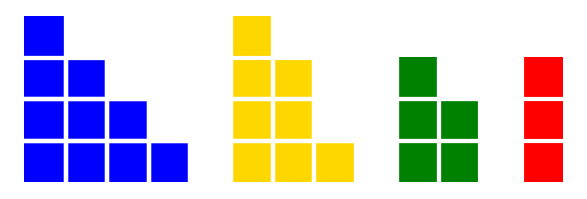

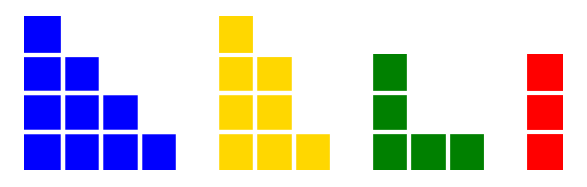

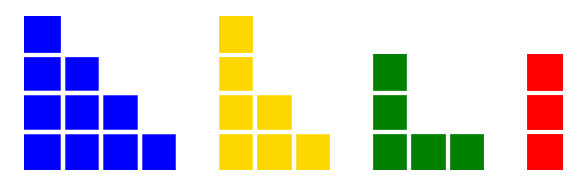

In [86]:
dessine_chaine([[4, 3, 2, 1], [3, 2, 2, 1], [2, 2, 1], [1, 1, 1]])
dessine_chaine([[4, 3, 2, 1], [3, 2, 2, 1], [3,1, 1], [1, 1, 1]])
dessine_chaine([[4, 3, 2, 1], [3, 2, 1, 1], [3,1, 1], [1, 1, 1]])

## Here we check that the calculation of $\sigma(\mu)$ is "locally" compatible with the Delta conjecture, which is to say that for each $\mu$
 ###  $$(e_k^\perp \sigma_n(\mu))(q,0,0,\ldots)=\sum_{{J\supseteq {\mathrm{des}(\mu)}}\atop {\# J=n-1-k}} q^{\sum_{i\in J} a_i}.$$

In [8]:
[(n,k,Set([(sigma_prime(mu,n).skew_by(e[n-1-k]))(q*Un).scalar(Un)==Jim(mu,n,n,k) 
           for mu in Dyck(n)])) for n in range(2,7) for k in range(n)]

[(2, 0, {True}),
 (2, 1, {True}),
 (3, 0, {True}),
 (3, 1, {True}),
 (3, 2, {True}),
 (4, 0, {True}),
 (4, 1, {True}),
 (4, 2, {True}),
 (4, 3, {True}),
 (5, 0, {True}),
 (5, 1, {True}),
 (5, 2, {True}),
 (5, 3, {True}),
 (5, 4, {True}),
 (6, 0, {True}),
 (6, 1, {True}),
 (6, 2, {True}),
 (6, 3, {True}),
 (6, 4, {True}),
 (6, 5, {True})]

for n in range(3,8):
    show((n,sigma_prime(Partition([n-1]),n)==sigma_prime(Partition([0]),n-1)))

### 1) $\sigma_{m,n}(\mu)=\sigma_{n,m}(\mu')$,

### 2) for $\mu\subseteq \delta_{n-1}$, we have $\sigma_n(\mu+1^{n-1}) = \sigma_{n-1}(\mu)=\sigma_n((n-1,\mu))$,


In [59]:
def long_sigma(mu,n):
    return n-risers(mu,n).__len__()

def a_trouver(n):
    return (Set([mu for mu in Dyck(n) if long_sigma(mu,n)>1]).difference(Set([plus(mu,colone(n-1)) 
                              for mu in Dyck(n)]))).difference(Set([Partition([n-1]+list(mu)) 
                                                                    for mu in Dyck(n-1)]))

In [62]:
n=4
for mu in a_trouver(n):
    show((mu,n-risers(Partition(mu),n).__len__()))

([2], 2)

([], 3)

([1, 1], 2)

([1], 2)

([2, 2], 2)

In [25]:
(add(q^distance(mu,Partition([0]),4)*sigma(mu,4) for mu in Dyck(4))-CalA_mn(4)(X+q))

(-q^3+q^2)*s[2] + (q^3-q^2)*s[3]

In [15]:
(add(q^distance(mu,Partition([0]),5)*sigma_prime(mu,5) 
                     for mu in Dyck(5)))(X-q)

(q^8-q^7-q^6+q^4)*s[1] + (q^6+q^5-q^4-q^3)*s[1, 1] + s[1, 1, 1, 1] + (-q^8+q^7+2*q^6-q^4-q^3)*s[2] + (-q^6-q^4+q^3+q^2)*s[2, 1] + (-q^4+q^3)*s[2, 2] + (-q^6+q^4)*s[3] + s[3, 1, 1] + (q^3-q^2)*s[3, 2] + (-q^4+q^2)*s[4] + s[4, 1, 1] + s[4, 2] + s[4, 3] + (q^3-q^2)*s[5, 1] + s[5, 1, 1] + s[6, 1] + s[6, 2] + (q^3-q^2)*s[7] + s[7, 1] + s[8, 1] + s[10]

In [25]:
CalA_mn(5)-(add_row(1,CalA_mn(4))+addmu([4],CalA_mn(4)))

s[4, 2] + s[4, 3] + s[6, 2]

In [26]:
CalA_mn(6)-(add_row(1,CalA_mn(5))+addmu([5],CalA_mn(5)))

s[4, 4] + s[4, 4, 1] + s[5, 2, 1] + s[5, 3, 1] + s[6, 3] + s[6, 3, 1] + s[6, 4] + s[7, 2] + s[7, 2, 1] + s[7, 3] + s[7, 4] + s[8, 2] + s[8, 2, 1] + s[8, 3] + s[10, 2]

In [28]:
CalA_mn(4)(X+q)

q^6*s[] + (q^5+q^4+q^3)*s[1] + (q^3+q^2+q)*s[1, 1] + s[1, 1, 1] + (q^4+q^3+q^2)*s[2] + (q^2+q)*s[2, 1] + (q^3+q^2+q)*s[3] + (q+1)*s[3, 1] + (q^2+q)*s[4] + s[4, 1] + q*s[5] + s[6]

### 4)  for which $\mu$ do we have  
 ###  $$\sum_{\nu\preceq \mu} \sigma_n(\nu) \not= \sigma_{n}(\mu)[1+\mathbf{q}]$$


In [42]:
def defaut_Intervale(mu,n):
    return add(sigma(nu,n) for nu in Intervale(staircase(n,n),mu,n))-sigma_prime(mu,n)(X+1)

In [31]:
for n in range(1,6):
    show((n,[mu for mu in Dyck(n) if defaut_Intervale(mu,n)<>0]))

(1, [])

(2, [])

(3, [])

(4, [[2]])

(5,
 [[],
  [1],
  [2],
  [1, 1],
  [3],
  [2, 1],
  [1, 1, 1],
  [3, 1],
  [2, 2],
  [2, 1, 1],
  [3, 2],
  [3, 1, 1],
  [4, 2],
  [3, 1, 1, 1]])

In [34]:
n=5
for k in range(n):
    show(chaines(n,n-1-k))

[[[]]]

[[[4], [3], [2], [1]],
 [[1, 1, 1, 1]],
 [[3, 3], [2, 2], [1, 1]],
 [[2, 2, 2], [1, 1, 1]]]

[[[4, 3], [4, 2], [3, 2], [4, 1], [3, 1], [2, 1]],
 [[4, 1, 1, 1], [3, 1, 1, 1], [2, 1, 1, 1]],
 [[2, 2, 2, 1]],
 [[4, 2, 2], [3, 2, 2], [4, 1, 1], [3, 1, 1], [2, 1, 1]],
 [[3, 3, 2], [3, 3, 1], [2, 2, 1]],
 [[3, 3, 1, 1], [2, 2, 1, 1]]]

[[[4, 3, 2], [4, 3, 1], [4, 2, 1], [3, 2, 1]],
 [[4, 3, 1, 1], [4, 2, 1, 1], [3, 2, 1, 1]],
 [[4, 2, 2, 1], [3, 2, 2, 1]],
 [[3, 3, 2, 1]]]

[[[4, 3, 2, 1]]]

In [35]:
n=6
for k in range(n):
    show(chaines(n,n-1-k))

[[[]]]

[[[5], [4], [3], [2], [1]],
 [[1, 1, 1, 1, 1]],
 [[4, 4], [3, 3], [2, 2], [1, 1]],
 [[2, 2, 2, 2], [1, 1, 1, 1]],
 [[3, 3, 3], [2, 2, 2], [1, 1, 1]]]

[[[5, 4],
  [5, 3],
  [4, 3],
  [5, 2],
  [4, 2],
  [3, 2],
  [5, 1],
  [4, 1],
  [3, 1],
  [2, 1]],
 [[5, 1, 1, 1, 1], [4, 1, 1, 1, 1], [3, 1, 1, 1, 1], [2, 1, 1, 1, 1]],
 [[2, 2, 2, 2, 1]],
 [[5, 3, 3],
  [4, 3, 3],
  [5, 2, 2],
  [4, 2, 2],
  [3, 2, 2],
  [5, 1, 1],
  [4, 1, 1],
  [3, 1, 1],
  [2, 1, 1]],
 [[5, 2, 2, 2],
  [4, 2, 2, 2],
  [3, 2, 2, 2],
  [5, 1, 1, 1],
  [4, 1, 1, 1],
  [3, 1, 1, 1],
  [2, 1, 1, 1]],
 [[4, 4, 3], [4, 4, 2], [3, 3, 2], [4, 4, 1], [3, 3, 1], [2, 2, 1]],
 [[4, 4, 1, 1, 1], [3, 3, 1, 1, 1], [2, 2, 1, 1, 1]],
 [[3, 3, 3, 2], [3, 3, 3, 1], [2, 2, 2, 1]],
 [[3, 3, 3, 1, 1], [2, 2, 2, 1, 1]],
 [[4, 4, 2, 2], [3, 3, 2, 2], [4, 4, 1, 1], [3, 3, 1, 1], [2, 2, 1, 1]]]

[[[5, 4, 3],
  [5, 4, 2],
  [5, 3, 2],
  [4, 3, 2],
  [5, 4, 1],
  [5, 3, 1],
  [4, 3, 1],
  [5, 2, 1],
  [4, 2, 1],
  [3, 2, 1]],
 [[5, 4, 1, 1, 1],
  [5, 3, 1, 1, 1],
  [4, 3, 1, 1, 1],
  [5, 2, 1, 1, 1],
  [4, 2, 1, 1, 1],
  [3, 2, 1, 1, 1]],
 [[5, 2, 2, 2, 1], [4, 2, 2, 2, 1], [3, 2, 2, 2, 1]],
 [[3, 3, 3, 2, 1]],
 [[5, 4, 2, 2],
  [5, 3, 2, 2],
  [4, 3, 2, 2],
  [5, 4, 1, 1],
  [5, 3, 1, 1],
  [4, 3, 1, 1],
  [5, 2, 1, 1],
  [4, 2, 1, 1],
  [3, 2, 1, 1]],
 [[5, 3, 3, 2],
  [4, 3, 3, 2],
  [5, 3, 3, 1],
  [4, 3, 3, 1],
  [5, 2, 2, 1],
  [4, 2, 2, 1],
  [3, 2, 2, 1]],
 [[5, 3, 3, 1, 1],
  [4, 3, 3, 1, 1],
  [5, 2, 2, 1, 1],
  [4, 2, 2, 1, 1],
  [3, 2, 2, 1, 1]],
 [[4, 4, 3, 2], [4, 4, 3, 1], [4, 4, 2, 1], [3, 3, 2, 1]],
 [[4, 4, 3, 1, 1], [4, 4, 2, 1, 1], [3, 3, 2, 1, 1]],
 [[4, 4, 2, 2, 1], [3, 3, 2, 2, 1]]]

[[[5, 4, 3, 2], [5, 4, 3, 1], [5, 4, 2, 1], [5, 3, 2, 1], [4, 3, 2, 1]],
 [[5, 4, 3, 1, 1], [5, 4, 2, 1, 1], [5, 3, 2, 1, 1], [4, 3, 2, 1, 1]],
 [[5, 4, 2, 2, 1], [5, 3, 2, 2, 1], [4, 3, 2, 2, 1]],
 [[5, 3, 3, 2, 1], [4, 3, 3, 2, 1]],
 [[4, 4, 3, 2, 1]]]

[[[5, 4, 3, 2, 1]]]

In [11]:
@cached_function
def CalFq_n(n):
    return Pleth1(CalE_mn(n),X+q)

In [151]:
def sigma_prime(mu,m,n=None):
    if n==None:
        return sigma_prime(mu,m,m)
    elif m==5 and n==5:
        nu=[3,1]
        a=1
        if mu==Partition([1]): 
            return sigma(mu,n)+s[3,3]+s[5,2]
        elif mu==Partition([1,1]) or mu.conjugate()==Partition([1,1]): 
            return sigma(mu,n)+s[4,2]
        elif mu==Partition([1,1,1]) or mu.conjugate()==Partition([1,1,1]): 
            return sigma(mu,n)+s[3,2]
        elif mu==Partition([2,1]): 
            return sigma(mu,n)+s[3,2]
        elif mu==Partition([2,2]): 
            return sigma(mu,n)+s[2,2]-s[4,1]
        elif mu==Partition([3,1,1]): 
            return sigma(mu,n)+(1-a)*s[2,2]
        elif mu==Partition(nu) or mu.conjugate()==Partition(nu): 
            return sigma(mu,n)+a*s[2,2]
        else: return sigma(mu,m,n)
    else:
        return sigma(mu,m,n)

In [152]:
for n in range(1,6):
    show((n,tensor([s,P])(CalFq_n(n)-add(Tenseur(sigma_prime(mu,n),LLT(mu,n,q)) for mu in Dyck(n)))))

(1, 0)

(2, 0)

(3, 0)

(4, 0)

(5, -s[2, 2] # McdH[3, 1, 1] + q*s[4, 1] # McdH[2, 2, 1])

In [153]:
n=5
CalE_mn(n)-tensor([s,s])(add(Tenseur(sigma_prime(mu,n)(X-1),LLT(mu,n,1)) for mu in Dyck(n)))

-s[1, 1] # s[1, 1, 1, 1, 1] - 2*s[1, 1] # s[2, 1, 1, 1] - s[1, 1] # s[2, 2, 1] - s[1, 1] # s[3, 1, 1] + s[2, 1] # s[1, 1, 1, 1, 1] + 2*s[2, 1] # s[2, 1, 1, 1] + s[2, 1] # s[2, 2, 1] + s[2, 1] # s[3, 1, 1] - s[2, 2] # s[1, 1, 1, 1, 1] - 2*s[2, 2] # s[2, 1, 1, 1] - s[2, 2] # s[2, 2, 1] - s[2, 2] # s[3, 1, 1] + s[3] # s[1, 1, 1, 1, 1] + s[3] # s[2, 1, 1, 1] + s[3] # s[2, 2, 1] - s[3, 1] # s[1, 1, 1, 1, 1] - s[3, 1] # s[2, 1, 1, 1] - s[3, 1] # s[2, 2, 1] - s[4] # s[1, 1, 1, 1, 1] - s[4] # s[2, 1, 1, 1] - s[4] # s[2, 2, 1] + s[4, 1] # s[1, 1, 1, 1, 1] + s[4, 1] # s[2, 1, 1, 1] + s[4, 1] # s[2, 2, 1]

In [154]:
n=5
CalE_mn(n)-tensor([s,s])(add(Tenseur(sigma_prime(mu,n)(X-q),LLT(mu,n,q)) for mu in Dyck(n)))

(-q^5)*s[1, 1] # s[1, 1, 1, 1, 1] + (-q^4-q^3)*s[1, 1] # s[2, 1, 1, 1] + (-q^3)*s[1, 1] # s[2, 2, 1] + (-q^2)*s[1, 1] # s[3, 1, 1] + q^4*s[2, 1] # s[1, 1, 1, 1, 1] + (q^3+q^2)*s[2, 1] # s[2, 1, 1, 1] + q^2*s[2, 1] # s[2, 2, 1] + q*s[2, 1] # s[3, 1, 1] + (-q^3)*s[2, 2] # s[1, 1, 1, 1, 1] + (-q^2-q)*s[2, 2] # s[2, 1, 1, 1] + (-q)*s[2, 2] # s[2, 2, 1] - s[2, 2] # s[3, 1, 1] + q^5*s[3] # s[1, 1, 1, 1, 1] + q^4*s[3] # s[2, 1, 1, 1] + q^3*s[3] # s[2, 2, 1] + (-q^4)*s[3, 1] # s[1, 1, 1, 1, 1] + (-q^3)*s[3, 1] # s[2, 1, 1, 1] + (-q^2)*s[3, 1] # s[2, 2, 1] + (-q^4)*s[4] # s[1, 1, 1, 1, 1] + (-q^3)*s[4] # s[2, 1, 1, 1] + (-q^2)*s[4] # s[2, 2, 1] + q^3*s[4, 1] # s[1, 1, 1, 1, 1] + q^2*s[4, 1] # s[2, 1, 1, 1] + q*s[4, 1] # s[2, 2, 1]

In [155]:
n=5
for mu in Dyck(n):
    if sigma_prime(mu,n).scalar(s[2,2])<>0:
        show((mu,mu.conjugate(),sigma_prime(mu,n),PLLT(Partition(mu),5),long_sigma(mu,n)))

([3, 1], [2, 1, 1], s[2, 2] + s[4, 1] + s[6], q*McdH[3, 1, 1], 2)

([2, 2], [2, 2], s[2, 1, 1] + s[2, 2] + s[4, 1] + s[6], q*McdH[2, 2, 1], 3)

([2, 1, 1],
 [3, 1],
 s[2, 2] + s[4, 1] + s[6],
 (-q+1)*McdH[2, 2, 1] + (-q+1)*McdH[3, 1, 1] + McdH[3, 2],
 2)

In [121]:
PLLT(Partition([3,3]),5)

q^2*McdH[2, 2, 1]

In [150]:
for mu in Dyck(5):
    show((mu,sigma(mu,5)))

([],
 s[1, 1, 1, 1] + s[3, 1, 1] + s[4, 1, 1] + s[4, 2] + s[4, 3] + s[5, 1, 1] + s[6, 1] + s[6, 2] + s[7, 1] + s[8, 1] + s[10])

([1], s[4, 1, 1] + s[6, 1] + s[7, 1] + s[9])

([2], s[3, 1, 1] + s[5, 1] + s[6, 1] + s[8])

([1, 1], s[3, 1, 1] + s[5, 1] + s[6, 1] + s[8])

([3], s[2, 1, 1] + s[4, 1] + s[5, 1] + s[7])

([2, 1], s[5, 1] + s[7])

([1, 1, 1], s[2, 1, 1] + s[4, 1] + s[5, 1] + s[7])

([4], s[1, 1, 1] + s[3, 1] + s[4, 1] + s[6])

([3, 1], s[4, 1] + s[6])

([2, 2], s[2, 1, 1] + 2*s[4, 1] + s[6])

([2, 1, 1], s[4, 1] + s[6])

([1, 1, 1, 1], s[1, 1, 1] + s[3, 1] + s[4, 1] + s[6])

([4, 1], s[3, 1] + s[5])

([3, 2], s[3, 1] + s[5])

([3, 1, 1], s[3, 1] + s[5])

([2, 2, 1], s[3, 1] + s[5])

([2, 1, 1, 1], s[3, 1] + s[5])

([4, 2], s[2, 1] + s[4])

([4, 1, 1], s[2, 1] + s[4])

([3, 3], s[1, 1, 1] + s[2, 1] + s[3, 1] + s[4])

([3, 2, 1], s[4])

([3, 1, 1, 1], s[2, 1] + s[4])

([2, 2, 2], s[1, 1, 1] + s[2, 1] + s[3, 1] + s[4])

([2, 2, 1, 1], s[2, 1] + s[4])

([4, 3], s[1, 1] + s[3])

([4, 2, 1], s[3])

([4, 1, 1, 1], s[1, 1] + s[3])

([3, 3, 1], s[2, 1] + s[3])

([3, 2, 2], s[2, 1] + s[3])

([3, 2, 1, 1], s[3])

([2, 2, 2, 1], s[1, 1] + s[3])

([4, 3, 1], s[2])

([4, 2, 2], s[1, 1] + s[2])

([4, 2, 1, 1], s[2])

([3, 3, 2], s[1, 1] + s[2])

([3, 3, 1, 1], s[1, 1] + s[2])

([3, 2, 2, 1], s[2])

([4, 3, 2], s[1])

([4, 3, 1, 1], s[1])

([4, 2, 2, 1], s[1])

([3, 3, 2, 1], s[1])

([4, 3, 2, 1], s[])

In [4]:
def P_dualise(f):
    return add(c*Qp(mu) for (mu,c) in P(f))/add(c for (mu,c) in P(f))


In [24]:
Scalar2(CalFq_n(4),P_dualise(LLT([2,1],4,q)))

(q^2+q+1)*s[1] + (q+1)*s[2] + s[3]

In [20]:
sigma([2,1],4)(X+q+1)

(q^3+q^2+q+1)*s[] + (q^2+q+1)*s[1] + (q+1)*s[2] + s[3]

In [9]:
Scalar2??

In [29]:
Eval1(Skew1(e[1],CalE_mn(3)),1+q+t)

(q^2+q*t+t^2+2*q+2*t+2)*s[1, 1, 1] + (q+t+2)*s[2, 1]

In [30]:
Un

s[]

In [31]:
s[3](X+1)

s[] + s[1] + s[2] + s[3]